# CLASSIFICATION USING NEURAL NETWORKS AND DEEP LEARNING 

**PROGRAMMER:** Francis Mendoza 

**ASUID:** 1213055998

**EMAIL:** fmendoz7@asu.edu

**CLASS:** CSE575, Wednesday 15:00-16:15 hrs MST, Project 3

## PART 1: Assessing Original Boilerplate

In [ ]:
# Import all necessary modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

### MODIFIED CODE TO RUN: Just kept lr=0.1 for Adadelta method

In [ ]:
# MODIFIED THIS LINE, AS ORIGINAL BOILERPLATE DID NOT RUN CORRECTLY 
"""
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])
"""

# REPLACED WITH THIS LINE INSTEAD
"""
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1),
              metrics=['accuracy'])
"""

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('ORIGINAL BOILERPLATE: Learning Error')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Error')
    ax.grid(True)

plot_loss_accuracy(history)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# --------------------------------------------------------------------------------------

# PART 2: Changing Kernel Size

In this section, we:
* CHANGED FROM BOILERPLATE: Change the kernel size to 5*5
* Plot learning errors along the epoch
* Report testing error
* Report testing accuracy

In [ ]:
# Import all necessary modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten #imported more stuff
from keras.optimizers import RMSprop #imported more stuff
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Imported More Stuff
#from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()

# First Convolutional Layer
    # Changed Features
        # (!!!) Kernel Size = 5x5
        # (!!!) Added strides = 1 for first CL and for first MaxPool
    
    # Unchanged Features
        # Feature Maps = 6
        # Max Pooling = 2x2
model2.add(Conv2D(6, kernel_size=(5, 5),
                 strides=(1,1),
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# Second Convolutional Layer
    # Changed Features
        # (!!!) Kernel Size = 5x5
        # (!!!) Added strides = 1 for second CL and for second MaxPool
        
    # Unchanged Features
        # Feature Maps = 16
        # Max Pooling = 2x2 
model2.add(Conv2D(16, (5, 5), strides=(1,1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model2.add(Flatten())
# First hidden Layer of 120 nodes 
model2.add(Dense(120, activation='relu'))
# Second hidden Layer of 84 nodes 
model2.add(Dense(84, activation='relu'))

# Softmax layer with 10 nodes (based on 10 classes)
model2.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1),
              metrics=['accuracy'])

# Store model as variable to plot learning error over epochs later
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
# Function to plot learning loss over epochs
def plot_loss_accuracy(history2):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history2.history["loss"],'r-x', label="Train Loss")
    ax.plot(history2.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('5x5 KERNEL: Learning Error')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Error')
    ax.grid(True)

plot_loss_accuracy(history2)

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# --------------------------------------------------------------------------------------

# PART 3: Changing Feature Maps

In this section, we:
* **CHANGED FROM BOILERPLATE:** Change the number of feature maps in the first and second convolutional layers, added additional hyperparameters
* Plot learning errors along the epoch
* Report testing error
* Report testing accuracy

In [3]:
# Import all necessary modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten #imported more stuff
from keras.optimizers import RMSprop #imported more stuff
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Imported More Stuff
#from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model3 = Sequential()

# First Convolutional Layer
    # Changed Features 
        # (!!!) CHANGED FROM BOILERPLATE: 8 Feature Maps
        # (!!!) Added strides = 1 for first CL and for first MaxPool
        # (!!!) Added additional hyperparameter: padding = 'valid'
        
    # Unchanged Features
        # Max Pooling = 2x2
model3.add(Conv2D(8, kernel_size=(5, 5),
                 strides=(1,1),
                 activation='relu',
                 padding='valid',
                 input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# Second Convolutional Layer
    # Changed Features 
        # (!!!) CHANGED FROM BOILERPLATE: 20 Feature Maps
        # (!!!) Added strides = 1 for second CL and for second MaxPool
        # (!!!) Added additional hyperparameter: padding = 'valid'
        
    # Unchanged Features
        # Feature Maps = 6
model3.add(Conv2D(20, (5, 5), strides=(1,1), activation='relu', padding='valid'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model3.add(Flatten())
# First hidden Layer of 120 nodes 
model3.add(Dense(120, activation='relu'))
# Second hidden Layer of 84 nodes 
model3.add(Dense(84, activation='relu'))

# Softmax layer with 10 nodes (based on 10 classes)
model3.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1),
              metrics=['accuracy'])

# Store model as variable to plot learning error over epochs later
history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 42s 695us/step - loss: 0.4052 - accuracy: 0.8805 - val_loss: 0.1314 - val_accuracy: 0.9594
Epoch 2/12
60000/60000 [==============================] - 39s 657us/step - loss: 0.1088 - accuracy: 0.9680 - val_loss: 0.0825 - val_accuracy: 0.9760
Epoch 3/12
60000/60000 [==============================] - 40s 661us/step - loss: 0.0745 - accuracy: 0.9779 - val_loss: 0.0603 - val_accuracy: 0.9810
Epoch 4/12
60000/60000 [==============================] - 40s 659us/step - loss: 0.0589 - accuracy: 0.9828 - val_loss: 0.0511 - val_accuracy: 0.9830
Epoch 5/12
60000/60000 [==============================] - 39s 658us/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 6/12
60000/60000 [==============================] - 40s 662us/step - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0426 - val_accuracy: 0.9863
Epoch 7/12
60000/60000 [==============================] 

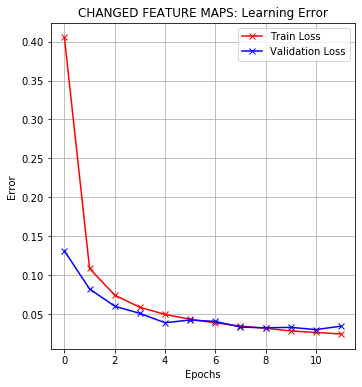

In [5]:
def plot_loss_accuracy(history3):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history3.history["loss"],'r-x', label="Train Loss")
    ax.plot(history3.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('CHANGED FEATURE MAPS: Learning Error')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Error')
    ax.grid(True)

plot_loss_accuracy(history3)

In [6]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0347609322346223
Test accuracy: 0.988099992275238
